## Calculo del espectro de potencias
## Implementación en Python 
### José Alberto Moreno Guerra

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import scipy.stats as st
from random import random
import matplotlib.pyplot as plt
import math 
from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs
from scipy.fftpack import fft, ifft
plt.style.use('classic')
%matplotlib inline

In [2]:
global vtx, vty
vtx = []
vty = []
def anillos(R,r,n,i):
    tcx=np.zeros(n)
    tcy=np.zeros(n)
    tcz=np.zeros(n)
    np.random.seed(i)
    centro1=(random()-0.5)*1000.0
    centro2=(random()-0.5)*1000.0
    for i in range(n):
        alpha=np.random.uniform(0, 2.*np.pi)
        beta=np.random.uniform(0, 2.*np.pi)
        x2=(R+r*math.cos(alpha))*math.cos(beta)-centro1
        y2=(R+r*math.cos(alpha))*math.sin(beta)-centro2
        z2=r*math.sin(alpha)
        check=math.sqrt(x1*x1+y1*y1)
        #if(check<=(R+r*math.cos(alpha))):
        tcx[i]=x2
        tcy[i]=y2
        vtx.append(tcx[i])
        vty.append(tcy[i])
        tcz[i]=z2
    plt.plot(tcx,tcy, 'b.')
    circle = plt.Circle((-centro1, -centro2), (R-r)-10.0, color='r', fill=False)
    plt.gcf().gca().add_artist(circle)
    circle = plt.Circle((-centro1, -centro2), (R+r)+10.0, color='r', fill=False)
    plt.gcf().gca().add_artist(circle)

### Generamos varias distribuciones de puntos, una aleatoria 

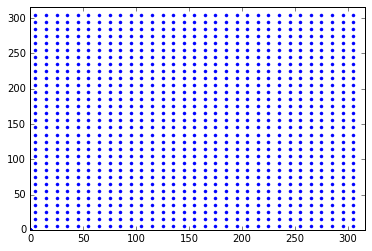

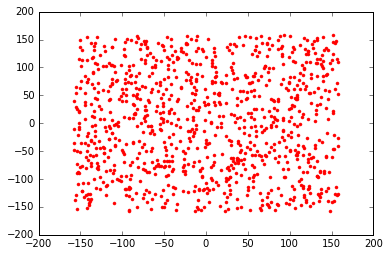

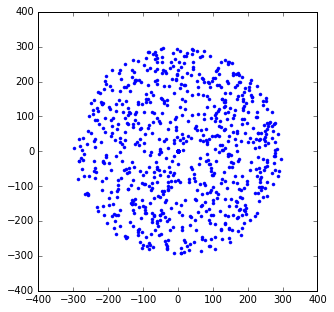

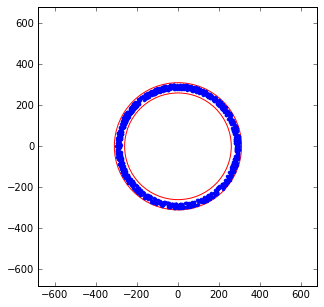

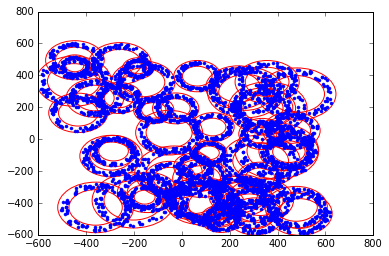

In [3]:
n=1000
rho=0.01
dim=np.sqrt(n/rho)
d=dim/np.sqrt(n)
x=np.zeros(n)
y=np.zeros(n)
radx=[]
rady=[]
k=0
for i in range(int(dim/d)):
    for j in range(int(dim/d)):   
        x[k]=(d/2)+d*i
        y[k]=(d/2)+d*j
        k=k+1
for i in range(n):
    radx.append((random()-0.5)*dim)
    rady.append((random()-0.5)*dim)
plt.plot(x,y, 'b.')
plt.axis([0.0, dim, 0.0, dim]) 
plt.show()
plt.plot(radx,rady, 'r.')
plt.show()

dia=600.0
lx=np.zeros(n)
ly=np.zeros(n)
for i in range(n):
    x1=np.random.uniform(-dia/2.0,dia/2.0)
    y1=np.random.uniform(-dia/2.0,dia/2.0)
    r=math.sqrt(x1*x1+y1*y1)
    if(r<=dia/2.0):
        lx[i]=x1
        ly[i]=y1
plt.figure(figsize=(5,5))
plt.plot(lx,ly, 'b.')
plt.axis([-(dia/2.0+100), (dia/2.0+100), -(dia/2.0+100), (dia/2.0+100)]) 
plt.show()

R=290.0
r=10.0
tx=np.zeros(n)
ty=np.zeros(n)
tz=np.zeros(n)
for i in range(n):
    alpha=np.random.uniform(0, 2.*np.pi)
    beta=np.random.uniform(0, 2.*np.pi)
    x2=(R+r*math.cos(alpha))*math.cos(beta)
    y2=(R+r*math.cos(alpha))*math.sin(beta)
    z2=r*math.sin(alpha)
    check=math.sqrt(x1*x1+y1*y1)
    tx[i]=x2
    ty[i]=y2
    tz[i]=z2
plt.figure(figsize=(5,5))
plt.plot(tx,ty, 'b.')
circle = plt.Circle((0, 0), 260, color='r', fill=False)
plt.gcf().gca().add_artist(circle)
circle = plt.Circle((0, 0), 310, color='r', fill=False)
plt.gcf().gca().add_artist(circle)
plt.axis([-(2*R+100), (2*R+100), -(2*R+100), (2*R+100)]) 
plt.show()

for i in range(50):
    np.random.seed(i)
    z=(1-(random()-0.5))*100
    c=z/10.0
    anillos(z,c,100,i)
plt.figure(figsize=(15,15))
plt.show()

In [4]:
def normalize(X):
    NORM = []
    for i in X:
        norm= (i-min(X))/(max(X)-min(X))
        NORM.append(norm)
    return NORM

In [5]:
def pwd(x,y,t_bins):
    n=np.size(x)
    dmax = math.sqrt(2.0*(dim**2))
    A = dim **2
    rd = []
    r_dx = []
    r_dy = []
    p = []
    k = []
    for i in range(n):
        for j in range(i+1,n-1):
            rx = math.sqrt((x[i]-x[j])**2.)
            ry = math.sqrt((y[i]-y[j])**2.)
            r = math.sqrt((x[i]-x[j])**2 + (y[i]-y[j])**2)
            if(r>0.1):
                rd.append(r)
                r_dx.append(rx)
                r_dy.append(ry)
                k_dr = np.sqrt((1.0/r)**2.0)
                k.append(k_dr)
    j=complex(0,1) # Se define el vector complejo, (0,1)
    k = k[0:t_bins]
    rd = rd[0:t_bins]
    for i in range(t_bins):
        ps = np.exp(-j*k[i]*np.array(rd))
        p.append((A/n)*((abs(np.sum(ps)))**2.)-(A/n))
    p = normalize(p)
    plt.plot(k,p,'o')
    plt.xlabel("$k$",fontsize = 20)   # Establece el título del eje x
    plt.ylabel("$P$ $(k)$",fontsize = 20)   # Establece el título del eje y
    plt.show()
    gf = fft(p)
    gf = gf[1:(np.size(gf)+1)/2]
    m = np.size(gf)
    xf = np.linspace((1.0/np.max(k)),(1.0/np.min(k)),m)
    plt.plot(xf,abs(gf), 'ro-')
    plt.xlabel("$r$",fontsize = 20)   # Establece el título del eje x
    plt.ylabel("$\zeta (r)$",fontsize = 20)   # Establece el título del eje y
    plt.autoscale
    plt.show()

## Para la Malla

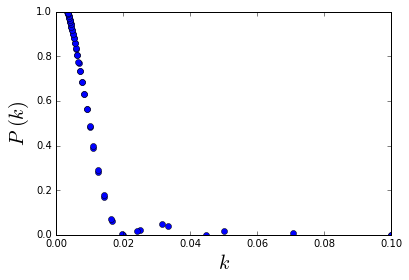

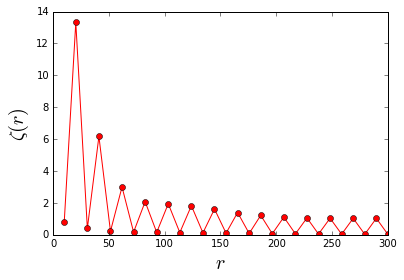

In [6]:
pwd(x,y,60)

## Para el disco

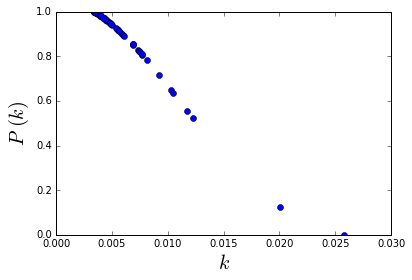

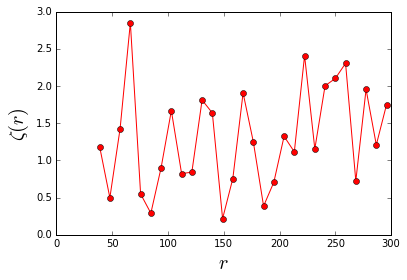

In [7]:
pwd(lx,ly,60)

## Para el anillo

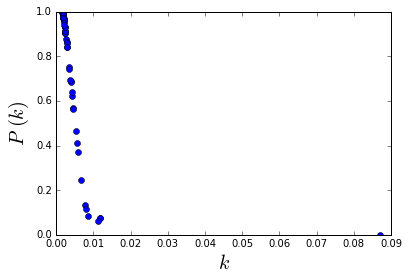

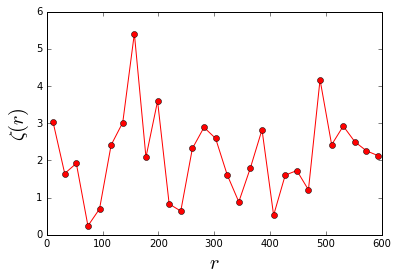

In [8]:
pwd(tx,ty,60)

## Para los anillos

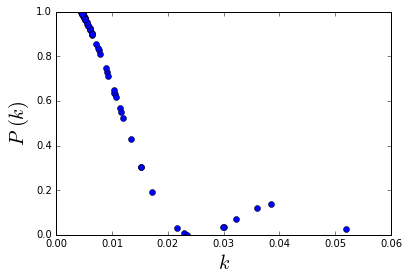

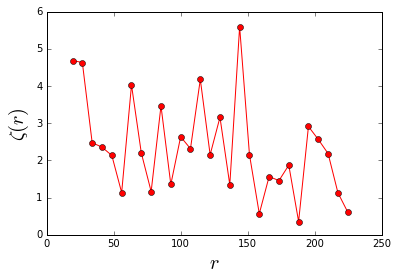

In [9]:
pwd(vtx,vty,60)